In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import customFunctions
# Dataset
df = pd.read_csv('autism_screening.csv', low_memory=False)
df.sample(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,ASD
472,1,0,1,1,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,4.0,18 and more,Self,NO
372,0,1,0,0,0,0,0,0,0,1,...,m,?,no,no,Kazakhstan,no,2.0,18 and more,?,NO


# Dataset Preparation

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jaundice         704 non-null    object 
 14  autism           704 non-null    object 
 15  country_of_res   704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [104]:
df.isna().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jaundice           0
autism             0
country_of_res     0
used_app_before    0
result             0
age_desc           0
relation           0
ASD                0
dtype: int64

In [105]:
# Age grouping
bins = [0, 25, 35, 45, 55, float('inf')]
labels = ['<25', '25-34', '35-44', '45-54', '55+']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
        
df['age_group'].value_counts()

<25      287
25-34    234
35-44    121
45-54     44
55+       16
Name: age_group, dtype: int64

## Data Cleaning

In [106]:
df = df.dropna()

In [107]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,0.723647,0.452991,0.458689,0.497151,0.498575,0.284900,0.417379,0.650997,0.324786,0.574074,29.698006,4.883191
std,0.447512,0.498140,0.498646,0.500348,0.500354,0.451689,0.493478,0.476995,0.468629,0.494835,16.507465,2.498051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [108]:
df['age'][df['age']>100]

52    383.0
Name: age, dtype: float64

In [109]:
df = df.drop(df[df['age']>100].index)

# Data Distribution and EDA

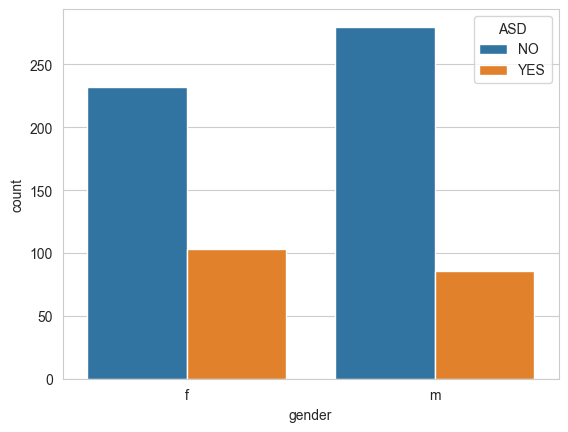

In [110]:
sns.countplot(data=df, x='gender', hue='ASD')
plt.show()

<AxesSubplot: xlabel='age', ylabel='ASD'>

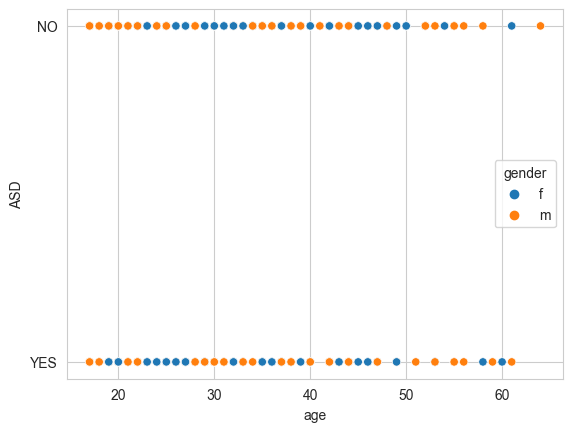

In [111]:
sns.scatterplot(data=df, x='age', y='ASD', hue='gender')

In [112]:
customFunctions.single_column_categorical_table(df, 'ethnicity', 'ASD')

ASD                                 NO     YES   Total
           ethnicity                                  
Count      ?                     84.00    9.00   93.00
           Asian                107.00   16.00  123.00
           Black                 25.00   18.00   43.00
           Hispanic               8.00    5.00   13.00
           Latino                10.00   10.00   20.00
           Middle Eastern        84.00    8.00   92.00
           Others                21.00    9.00   30.00
           Pasifika              10.00    1.00   11.00
           South Asian           33.00    3.00   36.00
           Total                512.00  189.00  701.00
           Turkish                5.00    1.00    6.00
           White-European       124.00  109.00  233.00
           others                 1.00    0.00    1.00
Percentage ? (%)                 11.98    1.28   13.27
           Asian (%)             15.26    2.28   17.55
           Black (%)              3.57    2.57    6.13
           Hispanic (%)           1.14    0.71    1.85
           Latino (%)             1.43    1.43    2.85
           Middle Eastern  (%)   11.98    1.14   13.12
           Others (%)             3.00    1.28    4.28
           Pasifika (%)           1.43    0.14    1.57
           South Asian (%)        4.71    0.43    5.14
           Total (%)             73.04   26.96  100.00
           Turkish (%)            0.71    0.14    0.86
           White-European (%)    17.69   15.55   33.24
           others (%)             0.14    0.00    0.14

In [113]:
df['country_of_res'].unique()

array(['United States', 'Brazil', 'Spain', 'Egypt', 'New Zealand',
       'Bahamas', 'Burundi', 'Austria', 'Argentina', 'Jordan', 'Ireland',
       'United Arab Emirates', 'Afghanistan', 'Lebanon', 'United Kingdom',
       'South Africa', 'Italy', 'Pakistan', 'Bangladesh', 'Chile',
       'France', 'China', 'Australia', 'Canada', 'Saudi Arabia',
       'Netherlands', 'Romania', 'Sweden', 'Tonga', 'Oman', 'India',
       'Philippines', 'Sri Lanka', 'Sierra Leone', 'Ethiopia', 'Viet Nam',
       'Iran', 'Costa Rica', 'Germany', 'Mexico', 'Russia', 'Armenia',
       'Iceland', 'Nicaragua', 'Hong Kong', 'Japan', 'Ukraine',
       'Kazakhstan', 'AmericanSamoa', 'Uruguay', 'Serbia', 'Portugal',
       'Malaysia', 'Ecuador', 'Niger', 'Belgium', 'Bolivia', 'Aruba',
       'Finland', 'Turkey', 'Nepal', 'Indonesia', 'Angola', 'Azerbaijan',
       'Iraq', 'Czech Republic', 'Cyprus'], dtype=object)

<AxesSubplot: xlabel='count', ylabel='country_of_res'>

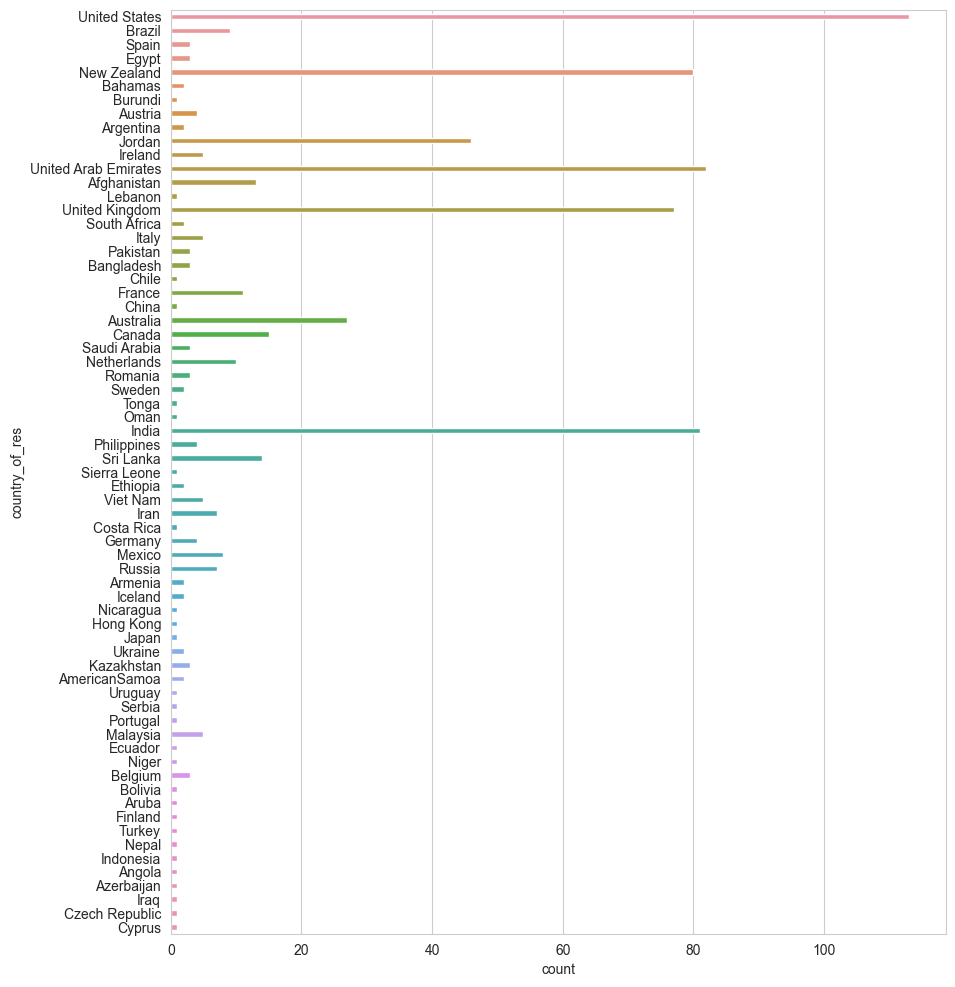

In [114]:
plt.figure(figsize=(10,12))
sns.countplot(data=df, y='country_of_res', width=.4 )

### The missing ethnicities can be mapped with country.

In [115]:
df['country_of_res'][df['ethnicity']=='?'].unique()

array(['Egypt', 'Bahamas', 'Austria', 'Argentina', 'United Arab Emirates',
       'Lebanon', 'Afghanistan', 'Jordan', 'Russia', 'New Zealand',
       'Hong Kong', 'Saudi Arabia', 'Japan', 'Ukraine', 'Kazakhstan',
       'Brazil', 'United Kingdom', 'Iran', 'United States', 'Azerbaijan',
       'Pakistan', 'Iraq'], dtype=object)

In [116]:
df['ethnicity'].unique()

array(['White-European', 'Latino', '?', 'Others', 'Black', 'Asian',
       'Middle Eastern ', 'Pasifika', 'South Asian', 'Hispanic',
       'Turkish', 'others'], dtype=object)

In [117]:
country_ethnicity_dict = {
    'Egypt': 'Middle Eastern ',
    'Bahamas': 'Black',
    'Austria': 'White-European',
    'Argentina': 'Latino',
    'United Arab Emirates': 'Middle Eastern ',
    'Lebanon': 'Middle Eastern ',
    'Afghanistan': 'Middle Eastern ',
    'Jordan': 'Middle Eastern ',
    'Russia': 'White-European',
    'New Zealand': 'Others',
    'Hong Kong': 'Asian',
    'Saudi Arabia': 'Middle Eastern ',
    'Japan': 'Asian',
    'Ukraine': 'White-European',
    'Kazakhstan': 'Asian',
    'Brazil': 'Latino',
    'United Kingdom': 'White-European',
    'Iran': 'Middle Eastern ',
    'United States': 'Others',
    'Azerbaijan': 'Middle Eastern ',
    'Pakistan': 'South Asian',
    'Iraq': 'Middle Eastern '
}

In [118]:
df['ethnicity'] = df['ethnicity'].replace('?', np.nan).fillna(df['country_of_res'].map(country_ethnicity_dict))

In [119]:
customFunctions.single_column_categorical_table(df, 'ethnicity', 'ASD')

ASD                                 NO     YES   Total
           ethnicity                                  
Count      Asian                112.00   16.00  128.00
           Black                 26.00   18.00   44.00
           Hispanic               8.00    5.00   13.00
           Latino                12.00   11.00   23.00
           Middle Eastern       150.00   11.00  161.00
           Others                25.00   11.00   36.00
           Pasifika              10.00    1.00   11.00
           South Asian           33.00    4.00   37.00
           Total                512.00  189.00  701.00
           Turkish                5.00    1.00    6.00
           White-European       130.00  111.00  241.00
           others                 1.00    0.00    1.00
Percentage Asian (%)             15.98    2.28   18.26
           Black (%)              3.71    2.57    6.28
           Hispanic (%)           1.14    0.71    1.85
           Latino (%)             1.71    1.57    3.28
           Middle Eastern  (%)   21.40    1.57   22.97
           Others (%)             3.57    1.57    5.14
           Pasifika (%)           1.43    0.14    1.57
           South Asian (%)        4.71    0.57    5.28
           Total (%)             73.04   26.96  100.00
           Turkish (%)            0.71    0.14    0.86
           White-European (%)    18.54   15.83   34.38
           others (%)             0.14    0.00    0.14

In [120]:
customFunctions.single_column_categorical_table(dataframe=df, index_column='gender', categorical_column='ASD')

ASD                       NO     YES   Total
           gender                           
Count      Total      512.00  189.00  701.00
           f          232.00  103.00  335.00
           m          280.00   86.00  366.00
Percentage Total (%)   73.04   26.96  100.00
           f (%)       33.10   14.69   47.79
           m (%)       39.94   12.27   52.21

In [121]:
customFunctions.single_column_categorical_table(dataframe=df, index_column='age_group', categorical_column='ASD')

ASD                       NO     YES   Total
           age_group                        
Count      25-34      172.00   62.00  234.00
           35-44       77.00   44.00  121.00
           45-54       29.00   15.00   44.00
           55+          8.00    7.00   15.00
           <25        226.00   61.00  287.00
           Total      512.00  189.00  701.00
Percentage 25-34 (%)   24.54    8.84   33.38
           35-44 (%)   10.98    6.28   17.26
           45-54 (%)    4.14    2.14    6.28
           55+ (%)      1.14    1.00    2.14
           <25 (%)     32.24    8.70   40.94
           Total (%)   73.04   26.96  100.00

In [122]:
customFunctions.show_percent(df, 'autism')

,Counts,Percentages
no,610,87.018545
yes,91,12.981455


In [123]:
customFunctions.show_percent(df, 'age_desc')

,Counts,Percentages
18 and more,701,100.0


In [124]:
customFunctions.show_percent(df, 'used_app_before')

,Counts,Percentages
no,689,98.28816
yes,12,1.71184


In [125]:
# unnecessary columns are dropped.
df = df.drop(['relation', 'age_desc','used_app_before'], axis=1)

### If the individual scores 6 or above, consider referring them for a specialist diagnostic assessment.

In [126]:
customFunctions.show_percent(df, 'result')

,Counts,Percentages
4.0,130,18.544936
3.0,110,15.691869
5.0,83,11.840228
2.0,74,10.556348
6.0,70,9.985735
7.0,57,8.131241
8.0,55,7.845934
9.0,47,6.704708
1.0,32,4.564907
10.0,30,4.279601


In [127]:
df['result'][df['result']>=6].value_counts().sum()

259

# Label Encoding

In [128]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [129]:
df['gender'] = le.fit_transform(df['gender'])
le.classes_

array(['f', 'm'], dtype=object)

In [130]:
df['ethnicity'] = le.fit_transform(df['ethnicity'])
le.classes_

array(['Asian', 'Black', 'Hispanic', 'Latino', 'Middle Eastern ',
       'Others', 'Pasifika', 'South Asian', 'Turkish', 'White-European',
       'others'], dtype=object)

In [131]:
df['jaundice'] = le.fit_transform(df['jaundice'])
le.classes_

array(['no', 'yes'], dtype=object)

In [132]:
df['autism'] = le.fit_transform(df['autism'])
le.classes_

array(['no', 'yes'], dtype=object)

In [133]:
df['ASD'] = le.fit_transform(df['ASD'])
le.classes_

array(['NO', 'YES'], dtype=object)

In [134]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,result,ASD
count,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000
mean,0.723252,0.453638,0.459344,0.497860,0.499287,0.285307,0.417974,0.651926,0.325250,0.574893,29.194009,0.522111,5.014265,0.098431,0.129815,4.888730,0.269615
std,0.447710,0.498201,0.498700,0.500352,0.500357,0.451883,0.493578,0.476700,0.468803,0.494712,9.711526,0.499868,3.457468,0.298109,0.336339,2.495516,0.444077
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,2.000000,0.000000,0.000000,3.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,1.000000,4.000000,0.000000,0.000000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,1.000000,9.000000,0.000000,0.000000,7.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,64.000000,1.000000,10.000000,1.000000,1.000000,10.000000,1.000000


# Correlation Map

Result and ASD columns are correlated by a lot margin. This is expected as stated in NHS Questions.

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


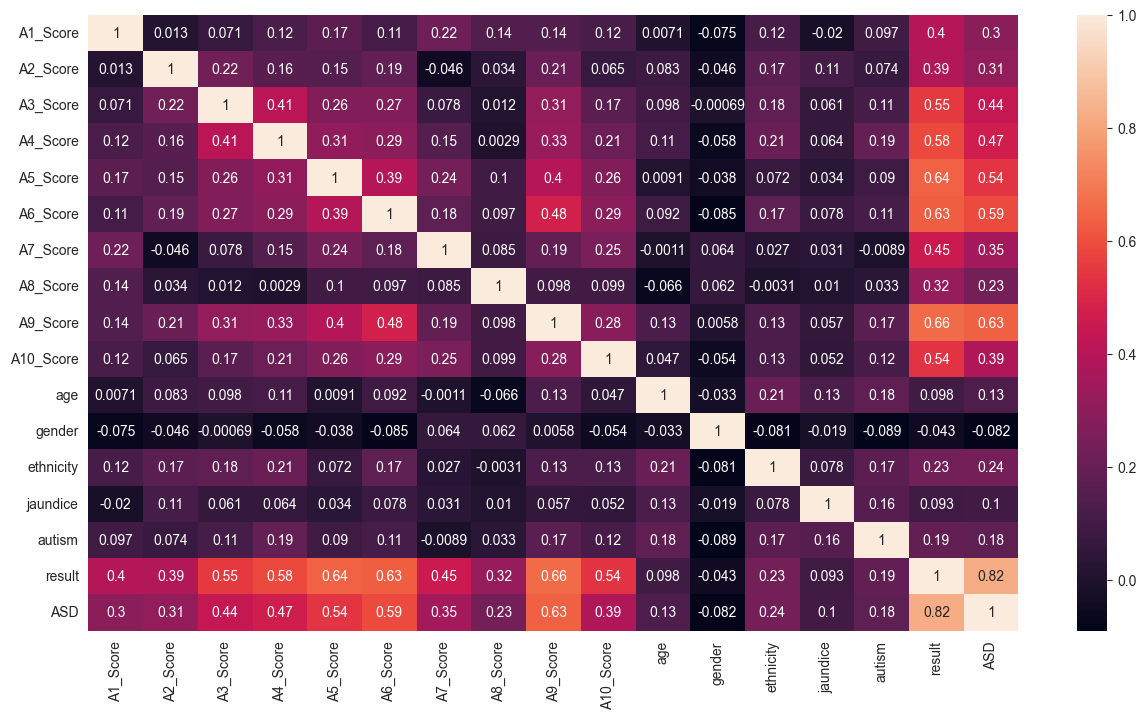

In [135]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Statistical Significance of Features

# Imbalance Checking

 The dataset is imbalanced, which is normal for medical datasets. However, SMOTE cant be used here as synthetic data isnt ideal for such curated question answer based dataset.
 - To solve this, we will use AUC ROC curves for model performance analysis.

<AxesSubplot: xlabel='ASD', ylabel='count'>

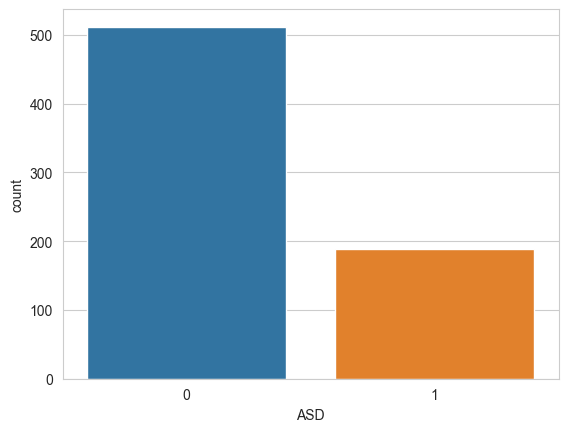

In [136]:
sns.countplot(data = df,x= 'ASD')

In [137]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'autism', 'country_of_res', 'result', 'ASD',
       'age_group'],
      dtype='object')

# Train Test Split

In [138]:
from sklearn.model_selection import train_test_split

X = df.drop(['country_of_res', 'age_group', 'ethnicity', 'result', 'ASD'], axis=1)
y = df['ASD']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

y_train.value_counts()

0    358
1    132
Name: ASD, dtype: int64

gender         2.230464
jaundice       6.498221
A8_Score      13.446138
A1_Score      17.088637
autism        19.026717
A2_Score      37.196019
age           39.569593
A10_Score     44.378307
A7_Score      50.544053
A3_Score      73.318512
A4_Score      77.336870
A5_Score     101.486985
A6_Score     175.241204
A9_Score     190.683915
dtype: float64


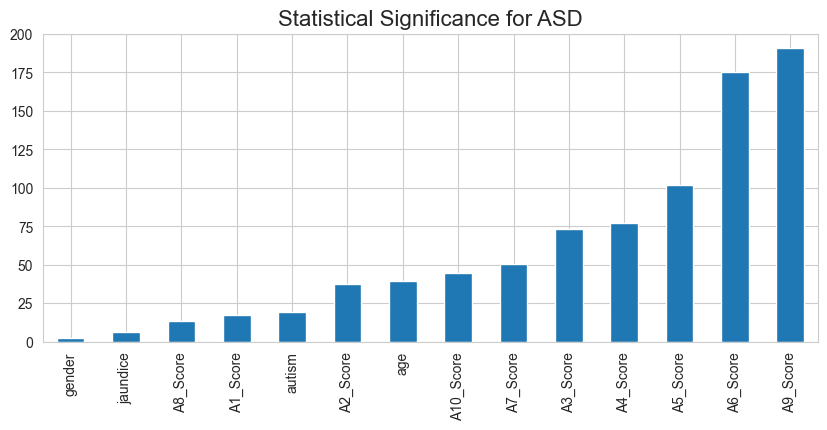

In [139]:
from sklearn.feature_selection import chi2
chi_val, p_val = chi2(X,y)

p_index = []
p_val_threshold = []
alpha = 0.05    # threshold for null hypothesis -> 5%

for j,k in enumerate(chi_val):
    p_val_threshold.append(k)
    p_index.append(X.columns[j])

p_val_series =  pd.Series(data=p_val_threshold, index=p_index).sort_values()
print(p_val_series)

plt.figure(figsize=(10,4))
ax = p_val_series.plot.bar()
plt.title(f"Statistical Significance for ASD", fontsize=16)
plt.show()

In [140]:
for i in df.iloc[:,:10]:
    print(customFunctions.odds_ratio(df, i, 'ASD'))

Odds Ratio: 9.00, p_val = 7.626861262470224e-18, 6.29-11.71
Odds Ratio: 4.34, p_val = 1.4567190190206053e-16, 1.99-6.70
Odds Ratio: 9.42, p_val = 1.4317131981506908e-32, 7.00-11.84
Odds Ratio: 13.76, p_val = 2.7266643203306615e-38, 11.26-16.27
Odds Ratio: 31.99, p_val = 2.2606545073530177e-52, 29.28-34.70
Odds Ratio: 18.78, p_val = 1.7196465941892396e-52, 16.36-21.20
Odds Ratio: 5.22, p_val = 1.7453514602840816e-20, 2.87-7.58
Odds Ratio: 3.63, p_val = 1.3929334680398287e-10, 1.20-6.06
Odds Ratio: 26.04, p_val = 1.73718937457554e-62, 23.59-28.50
Odds Ratio: 9.43, p_val = 5.077758767745703e-27, 6.92-11.94


# Classification

In [232]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline

from xgboost import XGBClassifier
# from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier

In [236]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Output function
def print_metrics(y_test, y_pred):
    print(classification_report(y_test, y_pred))
    print(f"ROC_AUC Score: {roc_auc_score(y_test, y_pred)}")
    # return  sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)


In [237]:
classifiers = [
    XGBClassifier(),
    LogisticRegression(),
    SVC(),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    RandomForestClassifier()
]

for clf in classifiers:
    print(clf)
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),
        ('clf', clf)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print_metrics(y_test, y_pred)
    
    print("___________________________")

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       154
           1       0.89      0.88      0.88        57

    accuracy                           0.94       211
   macro avg       0.92      0

## XGBoost

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       154
           1       0.93      0.91      0.92        57

    accuracy                           0.96       211
   macro avg       0.95      0.94      0.95       211
weighted avg       0.96      0.96      0.96       211

ROC_AUC Score: 0.94315333789018


<AxesSubplot: >

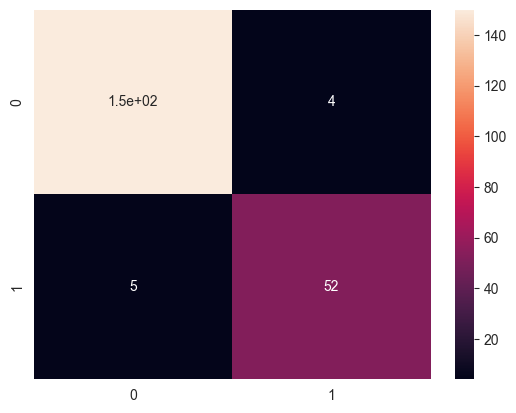

In [230]:
from xgboost import XGBClassifier
xgb = XGBClassifier(max_depth=10)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
y_pred_proba = xgb.predict_proba(X_test)
print_metrics(y_test, y_pred)

## Decision Tree

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       154
           1       0.74      0.91      0.82        57

    accuracy                           0.89       211
   macro avg       0.85      0.90      0.87       211
weighted avg       0.90      0.89      0.89       211

ROC_AUC Score: 0.8976987924356344


<AxesSubplot: >

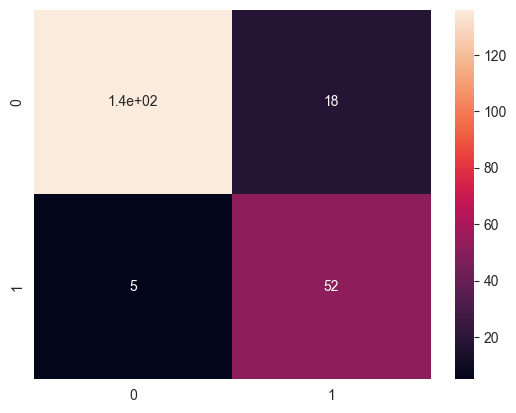

In [231]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print_metrics(y_test, y_pred)

## Random Forest

In [213]:
import shap
def shap_plot(base_model, instance):
    model = base_model.fit(X_train, y_train)      # fit model as usual

    explainer = shap.Explainer(model, X_train)   # this is the shap part, it will change according to the models.
    shap_values = explainer(X_test)  # calculating feature importance score

    shap.initjs()           # this is for the plot to work
    print(f"Sample number: {instance}")

    preds = model.predict(X_test)
    probability = model.predict_proba(X_test)

    print(f"Actual class: {y_test.iloc[instance]}")
    print(f"Predicted class: {preds[instance]}")
    print(f"Class 0 Possibility: {probability[instance][0]:.2f}")
    print(f"Class 1 Possibility: {probability[instance][1]:.2f}")

    # print(X_test.iloc[instance])      # to view the values of instance
    # print(shap_values[instance])      # to view the shap scores

    # SHAP Plots
    shap.plots.beeswarm(shap_values, max_display=13)
    shap.plots.bar(shap_values[instance], max_display=13)
    shap.plots.waterfall(shap_values[instance])

    # force plot
    return shap.plots.force(shap_values[instance])

Sample number: 48
Actual class: 0
Predicted class: 1
Class 0 Possibility: 0.11
Class 1 Possibility: 0.89


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


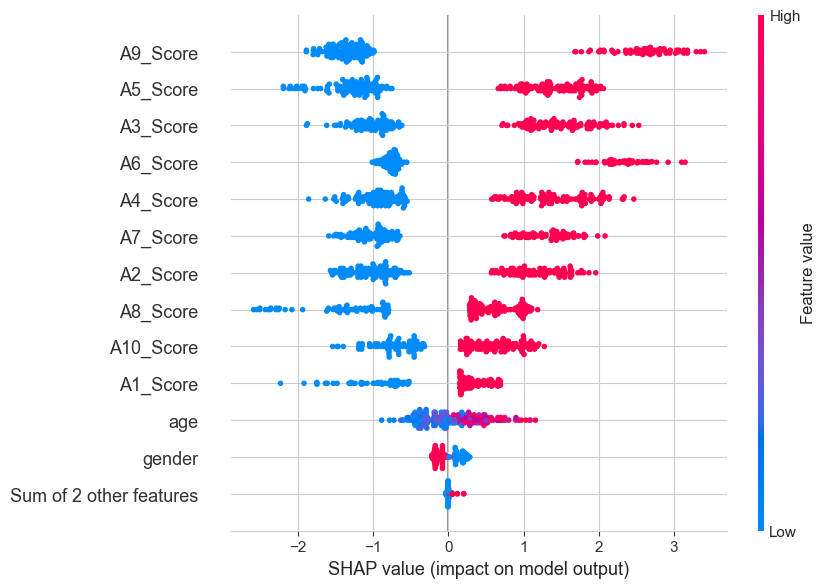

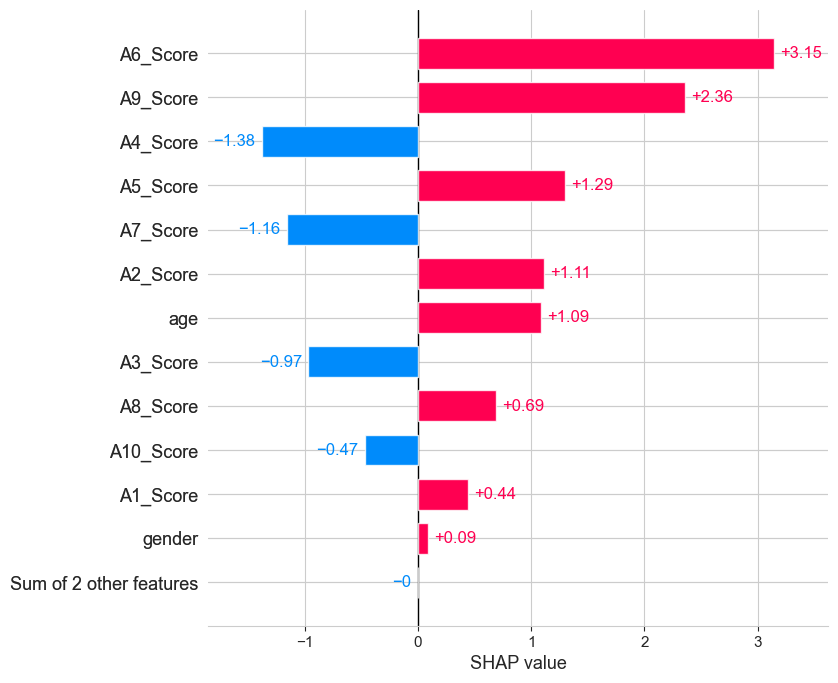

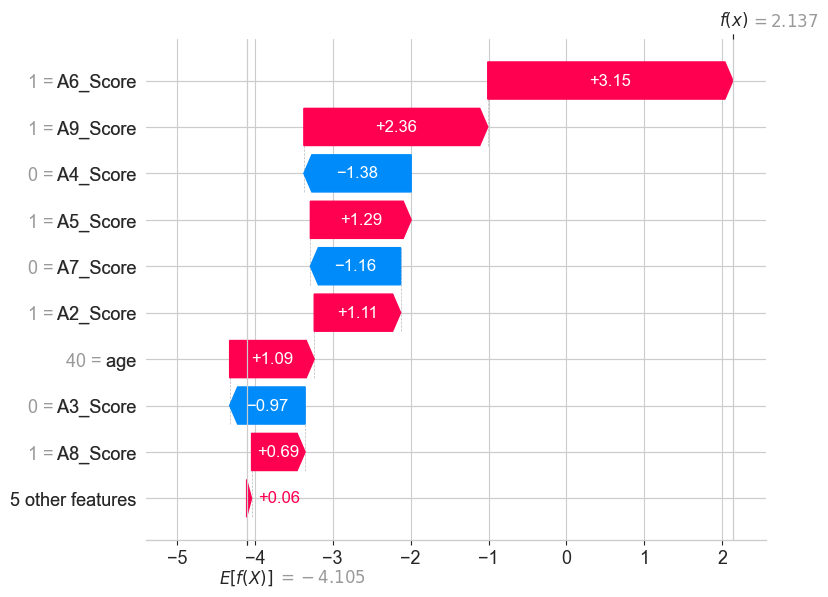

In [214]:
shap_plot(XGBClassifier(), 48)